In [136]:
import numpy as np

In [137]:
import pandas as pd

In [138]:
import matplotlib.pyplot as plt

In [139]:
from __future__ import print_function

In [140]:
from sklearn.neighbors import KNeighborsClassifier

In [141]:
from sklearn import metrics

In [142]:
from sklearn.model_selection import train_test_split

In [143]:
from sklearn.model_selection import cross_val_score

In [144]:
from sklearn.model_selection import GridSearchCV

In [145]:
%config InlineBackend.figure_format = 'svg'

In [146]:
%matplotlib inline 

In [147]:
df = pd.read_csv('bodyPerformance.csv')

In [148]:
df.head()

age gender  height_cm  weight_kg  body fat_%  diastolic  systolic  \
0  27.0      M      172.3      75.24        21.3       80.0     130.0   
1  25.0      M      165.0      55.80        15.7       77.0     126.0   
2  31.0      M      179.6      78.00        20.1       92.0     152.0   
3  32.0      M      174.5      71.10        18.4       76.0     147.0   
4  28.0      M      173.8      67.70        17.1       70.0     127.0   

   gripForce  sit and bend forward_cm  sit-ups counts  broad jump_cm class  
0       54.9                     18.4            60.0          217.0     C  
1       36.4                     16.3            53.0          229.0     A  
2       44.8                     12.0            49.0          181.0     C  
3       41.4                     15.2            53.0          219.0     B  
4       43.5                     27.1            45.0          217.0     B

In [149]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13393 entries, 0 to 13392
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      13393 non-null  float64
 1   gender                   13393 non-null  object 
 2   height_cm                13393 non-null  float64
 3   weight_kg                13393 non-null  float64
 4   body fat_%               13393 non-null  float64
 5   diastolic                13393 non-null  float64
 6   systolic                 13393 non-null  float64
 7   gripForce                13393 non-null  float64
 8   sit and bend forward_cm  13393 non-null  float64
 9   sit-ups counts           13393 non-null  float64
 10  broad jump_cm            13393 non-null  float64
 11  class                    13393 non-null  object 
dtypes: float64(10), object(2)
memory usage: 1.2+ MB


In [150]:
df.isna()

age  gender  height_cm  weight_kg  body fat_%  diastolic  systolic  \
0      False   False      False      False       False      False     False   
1      False   False      False      False       False      False     False   
2      False   False      False      False       False      False     False   
3      False   False      False      False       False      False     False   
4      False   False      False      False       False      False     False   
...      ...     ...        ...        ...         ...        ...       ...   
13388  False   False      False      False       False      False     False   
13389  False   False      False      False       False      False     False   
13390  False   False      False      False       False      False     False   
13391  False   False      False      False       False      False     False   
13392  False   False      False      False       False      False     False   

       gripForce  sit and bend forward_cm  sit-ups counts  broad jump_cm  \
0          False                    False           False          False   
1          False                    False           False          False   
2          False                    False           False          False   
3          False                    False           False          False   
4          False                    False           False          False   
...          ...                      ...             ...            ...   
13388      False                    False           False          False   
13389      False                    False           False          False   
13390      False                    False           False          False   
13391      False                    False           False          False   
13392      False                    False           False          False   

       class  
0      False  
1      False  
2      False  
3      False  
4      False  
...      ...  
13388  False  
13389  False  
13390  False  
13391  False  
13392  False  

[13393 rows x 12 columns]

In [151]:
df.rename(columns={'height_cm':'height',
                   'weight_kg':'weight',
                   'body fat_%':'bodyFat',
                   'sit and bend forward_cm':'SABF',
                   'sit-ups counts': 'SUC',
                   'broad jump_cm':'broadJump'},inplace=True)

In [152]:
df.dtypes

age          float64
gender        object
height       float64
weight       float64
bodyFat      float64
diastolic    float64
systolic     float64
gripForce    float64
SABF         float64
SUC          float64
broadJump    float64
class         object
dtype: object

In [153]:
df.head()

age gender  height  weight  bodyFat  diastolic  systolic  gripForce  SABF  \
0  27.0      M   172.3   75.24     21.3       80.0     130.0       54.9  18.4   
1  25.0      M   165.0   55.80     15.7       77.0     126.0       36.4  16.3   
2  31.0      M   179.6   78.00     20.1       92.0     152.0       44.8  12.0   
3  32.0      M   174.5   71.10     18.4       76.0     147.0       41.4  15.2   
4  28.0      M   173.8   67.70     17.1       70.0     127.0       43.5  27.1   

    SUC  broadJump class  
0  60.0      217.0     C  
1  53.0      229.0     A  
2  49.0      181.0     C  
3  53.0      219.0     B  
4  45.0      217.0     B

In [154]:
df['class'].unique()

array(['C', 'A', 'B', 'D'], dtype=object)

In [155]:
df['class'] = df['class'].str.strip()
df['class'].unique()

array(['C', 'A', 'B', 'D'], dtype=object)

In [156]:
df['gender'] = df['gender'].str.strip()
df['gender'].unique()

array(['M', 'F'], dtype=object)

In [157]:
df['gender'] = df['gender'].str.replace(('M'),('0'))
df['gender'] = df['gender'].str.replace(('F'),('1'))

In [158]:
df['gender']

0        0
1        0
2        0
3        0
4        0
        ..
13388    0
13389    0
13390    0
13391    1
13392    0
Name: gender, Length: 13393, dtype: object

In [159]:
df['gender'] = df['gender'].astype('int')

In [160]:
df['class'] = df['class'].str.replace(('D'),('0'))
df['class'] = df['class'].str.replace(('C'),('1'))
df['class'] = df['class'].str.replace(('B'),('2'))
df['class'] = df['class'].str.replace(('A'),('3'))


In [161]:
df['class']

0        1
1        3
2        1
3        2
4        2
        ..
13388    1
13389    0
13390    3
13391    0
13392    1
Name: class, Length: 13393, dtype: object

In [162]:
df['class'] = df['class'].astype('int')

In [163]:
df.dtypes

age          float64
gender         int32
height       float64
weight       float64
bodyFat      float64
diastolic    float64
systolic     float64
gripForce    float64
SABF         float64
SUC          float64
broadJump    float64
class          int32
dtype: object

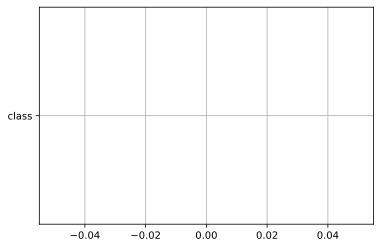

In [164]:
plt.plot(['class'])
plt.grid()

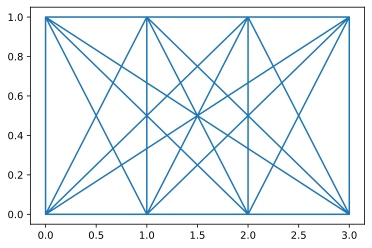

In [165]:
plt.plot(df['class'], df['gender'])

In [166]:
plt.bar(df['class'],['gender'])

<BarContainer object of 13393 artists>

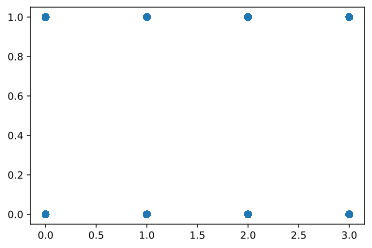

In [167]:
plt.scatter(df['class'], df['gender'])

In [168]:
plt.plot(df['class'])

In [169]:
x = df.iloc[:, :-1].values
y = df.iloc[:, 11].values

In [170]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.4, random_state=42)

In [171]:
print(X_train.shape)
print(X_test.shape)

(8035, 11)
(5358, 11)


In [172]:
print(y_train.shape)
print(y_test.shape)

(8035,)
(5358,)


In [173]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print(metrics.accuracy_score(y_test, y_pred))

0.5701754385964912


In [174]:
knn = KNeighborsClassifier(n_neighbors=5)
scores = cross_val_score(knn, x, y, cv=10, scoring='accuracy')
print(scores)

[0.54925373 0.59626866 0.56044776 0.57654966 0.58252427 0.56758775
 0.58775205 0.56534727 0.56684093 0.59073936]


In [175]:
print(scores.mean())

0.5743311448730953


In [176]:
k_range = list(range(1, 31))
k_scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, x, y, cv=10, scoring='accuracy')
    k_scores.append(scores.mean())
print(k_scores)

[0.5270688194576036, 0.5199754773555674, 0.5402096686099005, 0.5664181891141753, 0.5743311448730953, 0.5788107632115747, 0.5869504419649327, 0.5907579726461047, 0.5884431464782138, 0.5950883929865237, 0.5913551547713264, 0.5935209501410053, 0.5956108367795079, 0.5962073501053359, 0.5957603134439825, 0.5978507574153132, 0.5985964130059189, 0.6005383277785828, 0.6024049468861816, 0.5987475616688774, 0.6008380056402083, 0.6000163855851437, 0.6033764894719829, 0.6005389408446937, 0.6003890183139567, 0.6012110842352836, 0.6009873708381173, 0.600240433382007, 0.5997172650563464, 0.5996425824573919]


Text(0, 0.5, 'Cross-Validated Accuracy')

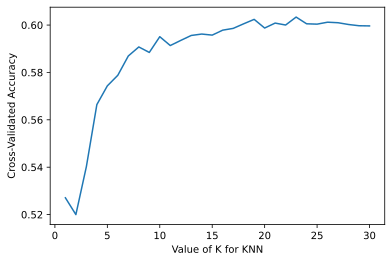

In [177]:
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')

In [178]:
k_range = list(range(1, 100))
print(k_range)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]


In [179]:
param_grid = dict(n_neighbors=k_range)
print(param_grid)

{'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]}


In [180]:
grid = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy')

In [181]:
grid.fit(x, y);

In [182]:
grid.cv_results_

{'mean_fit_time': array([0.03481016, 0.03271735, 0.03710155, 0.036602  , 0.033816  ,
        0.034605  , 0.03480458, 0.0362046 , 0.03230925, 0.0340075 ,
        0.03479891, 0.03440788, 0.03430412, 0.03411016, 0.03360598,
        0.03260722, 0.03361275, 0.03360279, 0.03131597, 0.03130779,
        0.03241372, 0.0338093 , 0.03350785, 0.03191123, 0.033606  ,
        0.03330986, 0.03500845, 0.03350339, 0.03172596, 0.03330429,
        0.0337095 , 0.03180876, 0.03181698, 0.03390896, 0.03251011,
        0.03390136, 0.03440647, 0.03360424, 0.0337086 , 0.0335114 ,
        0.03251264, 0.03291333, 0.03033824, 0.03140883, 0.03321495,
        0.03450749, 0.0333107 , 0.03191433, 0.03271754, 0.033111  ,
        0.0324163 , 0.03072107, 0.03331072, 0.03081806, 0.03111594,
        0.03440943, 0.03161647, 0.03081908, 0.03301177, 0.03231895,
        0.03500948, 0.03390951, 0.0326129 , 0.03181236, 0.03281469,
        0.03181498, 0.03181455, 0.0343055 , 0.03153355, 0.03103263,
        0.03390846, 0.03410866,

In [183]:
print("Best params: ", grid.best_params_)
print("Best estimator: ", grid.best_estimator_)
print("Best score: ", grid.best_score_)

Best params:  {'n_neighbors': 23}
Best estimator:  KNeighborsClassifier(n_neighbors=23)
Best score:  0.6033764894719829


In [184]:
k_range = list(range(1, 31))
weight_options = ['uniform', 'distance']

In [185]:
param_grid = dict(n_neighbors=k_range, weights=weight_options)
print(param_grid)

{'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30], 'weights': ['uniform', 'distance']}


In [186]:
grid = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy')
grid.fit(x, y)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(n_neighbors=30),
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25, 26, 27, 28, 29, 30],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy')

In [187]:
print("Best params: ", grid.best_params_)
print("Best estimator: ", grid.best_estimator_)
print("Best score: ", grid.best_score_)

Best params:  {'n_neighbors': 23, 'weights': 'uniform'}
Best estimator:  KNeighborsClassifier(n_neighbors=23)
Best score:  0.6033764894719829


In [189]:
knn = KNeighborsClassifier(n_neighbors=23, weights='uniform')
knn.fit(x, y)

knn.predict([[30,1 ,153 ,55,20,70 , 120,50,20,60, 200 ]])

array([3])

In [191]:
grid.predict([[30,1 ,153 ,55,20,70 , 120,50,20,60, 200]])

array([3])